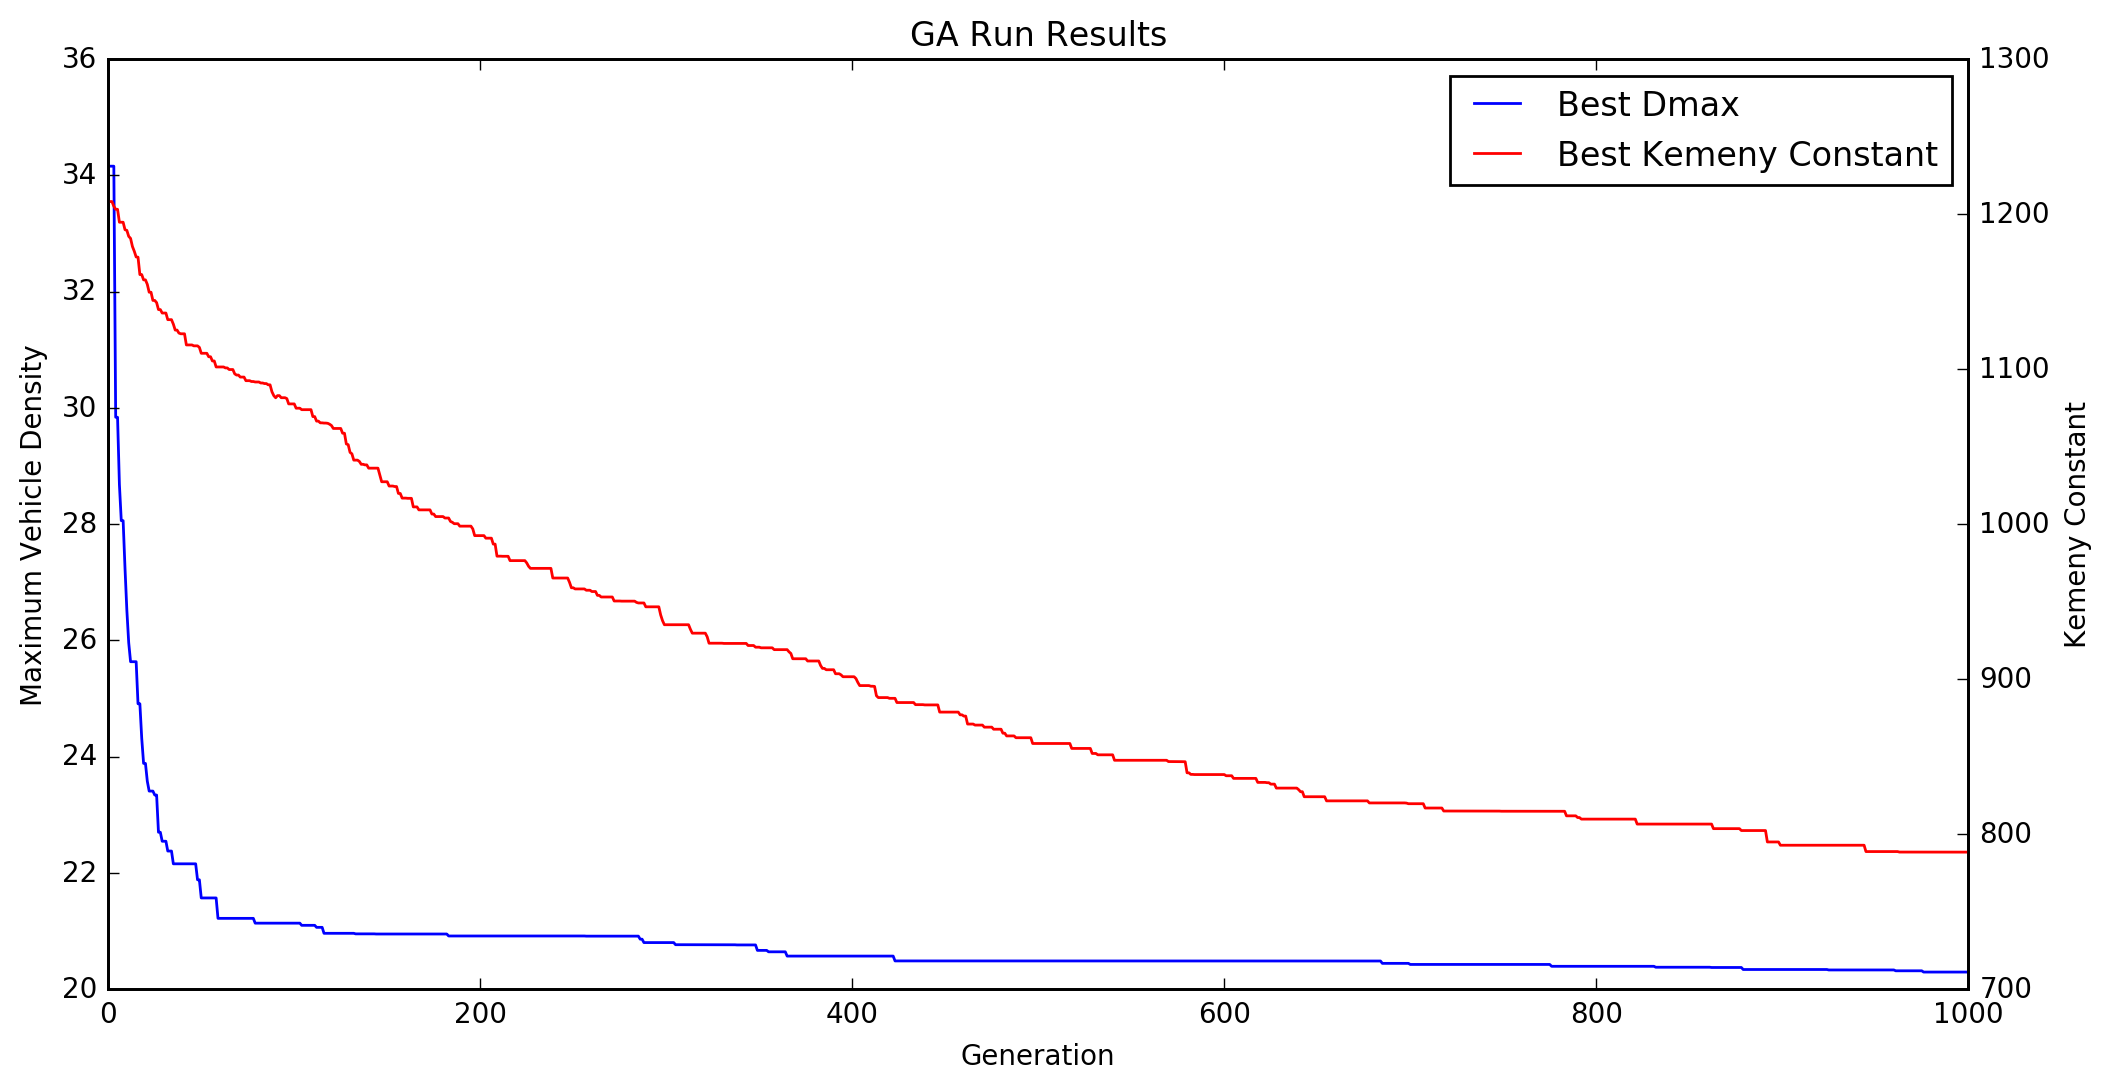

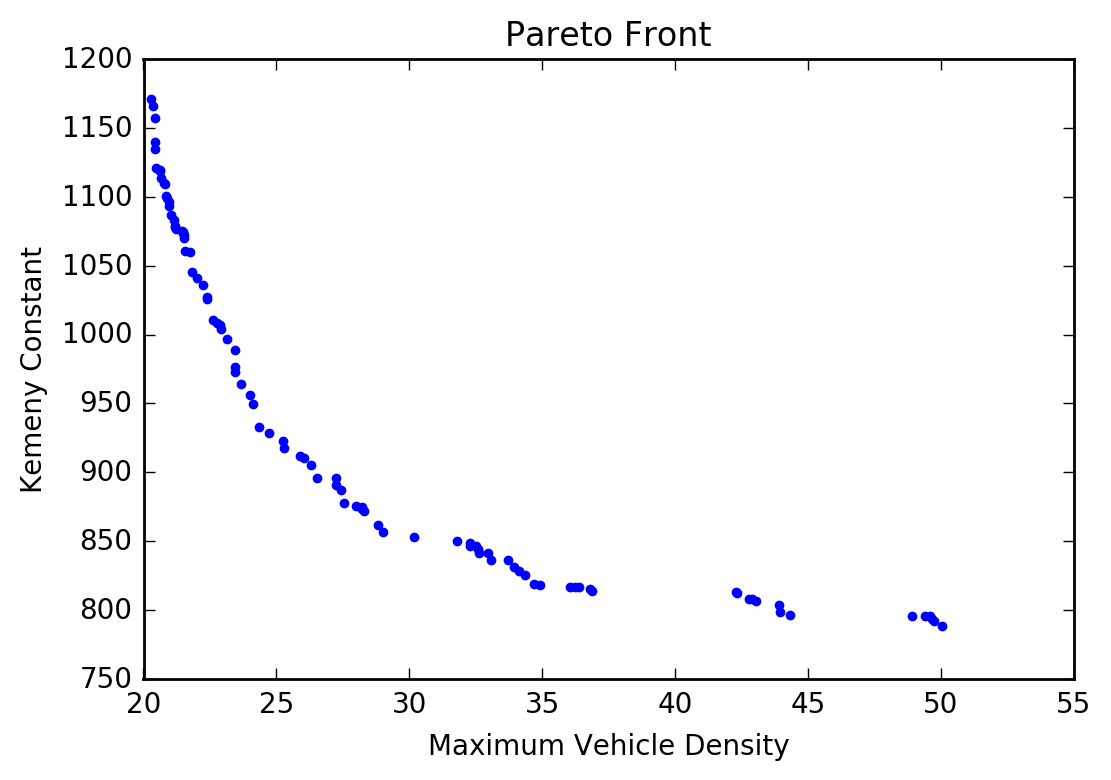

In [2]:
import pickle
import matplotlib.pyplot as plt
from deap import creator, base
%config InlineBackend.figure_format = 'retina'

creator.create("FitnessMin", base.Fitness, weights=(-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

data = pickle.load(open("ga_data.pkl","rb"))
logbook = data['logbook']
HoF = data['ParetoFront']
nObjectives = data['GA_Parameters']['nObjectives']

gen = logbook.select("gen")
D_min = logbook.chapters['record'].chapters["D"].select("min")
K = logbook.chapters['record'].chapters["K"].select("K(Dmin)")

D_min = logbook.chapters['record'].chapters["D"].select("min")
fig, ax1 = plt.subplots(figsize=[12,6])
line1 = ax1.plot(gen[:], D_min[:], "b-", label="Best Dmax")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Maximum Vehicle Density")
lns = line1

K_Dmin = logbook.chapters['record'].chapters["K_Dmin"].select("K_Dmin")
ax2 = ax1.twinx()
# line2 = ax2.plot(gen[:], K_Dmin[:], "g-", label="Kemeny(min Dmax)")
ax2.set_ylabel("Kemeny Constant")
# lns += line2

if nObjectives==2:
    K_min = logbook.chapters['record'].chapters["K"].select("min")
    line3 = ax2.plot(gen[:], K_min[:], "r-", label="Best Kemeny Constant")
    lns += line3

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right")
plt.title("GA Run Results")

if nObjectives==2:
    HoF_D = HoF['Dmax']
    HoF_K = HoF['K']
    fig, ax = plt.subplots()
    line = ax.plot(HoF_D, HoF_K,'.', label="Pareto Front")
    ax.set_xlabel("Maximum Vehicle Density")
    ax.set_ylabel("Kemeny Constant")
    plt.title("Pareto Front")

plt.show()